<a href="https://colab.research.google.com/github/josejulianhidayat/TrafficLight_FuzzyLogic/blob/main/Trafic_Light_with_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00



Traffic Light Control System Simulation
1. Simulate Traffic Light Control
2. Exit
Enter your choice (1 or 2): 1
Enter traffic density on the main road (0-10): 6
Enter traffic density on the side road (0-10): 3

Simulation Results:
Green Light Duration on Main Road: 41.21951219512202
Traffic Density on Main Road: 6.0
Traffic Density on Side Road: 3.0

Fuzzy Logic Matrix for Traffic Density on Main Road:
Traffic Density	Low	Medium	High
0		1.00	0.00	0.00
1		0.80	0.20	0.00
2		0.60	0.40	0.00
3		0.40	0.60	0.00
4		0.20	0.80	0.00
5		0.00	1.00	0.00
6		0.00	0.80	0.20
7		0.00	0.60	0.40
8		0.00	0.40	0.60
9		0.00	0.20	0.80
10		0.00	0.00	1.00

Fuzzy Logic Matrix for Traffic Density on Side Road:
Traffic Density	Low	Medium	High
0		1.00	0.00	0.00
1		0.80	0.20	0.00
2		0.60	0.40	0.00
3		0.40	0.60	0.00
4		0.20	0.80	0.00
5		0.00	1.00	0.00
6		0.00	0.80	0.20
7		0.00	0.60	0.40
8		0.00	0.40	0.60
9		0.00	0.20	0.80
10		0.00	0.00	1.00

Fuzzy Logic Matrix for Green Light Duration on Main Road:
Green Light Durati

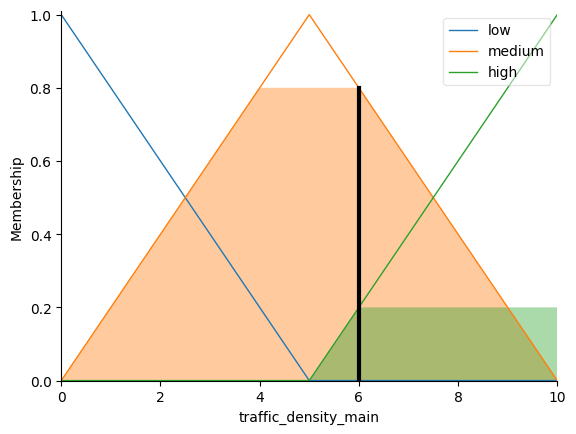

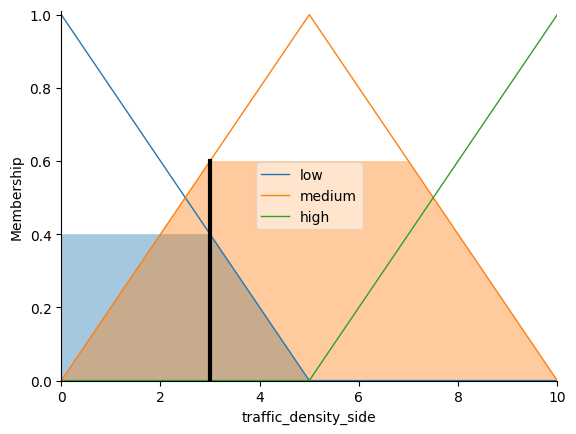

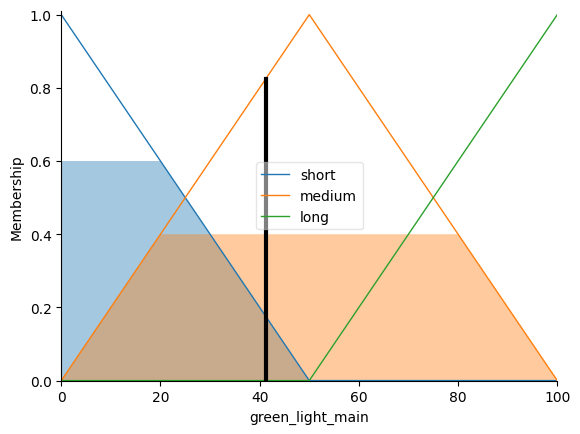

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
traffic_density_main = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_density_main')
traffic_density_side = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_density_side')
green_light_main = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_main')

# Define membership functions
traffic_density_main['low'] = fuzz.trimf(traffic_density_main.universe, [0, 0, 5])
traffic_density_main['medium'] = fuzz.trimf(traffic_density_main.universe, [0, 5, 10])
traffic_density_main['high'] = fuzz.trimf(traffic_density_main.universe, [5, 10, 10])

traffic_density_side['low'] = fuzz.trimf(traffic_density_side.universe, [0, 0, 5])
traffic_density_side['medium'] = fuzz.trimf(traffic_density_side.universe, [0, 5, 10])
traffic_density_side['high'] = fuzz.trimf(traffic_density_side.universe, [5, 10, 10])

green_light_main['short'] = fuzz.trimf(green_light_main.universe, [0, 0, 50])
green_light_main['medium'] = fuzz.trimf(green_light_main.universe, [0, 50, 100])
green_light_main['long'] = fuzz.trimf(green_light_main.universe, [50, 100, 100])

# Define rules
rule1 = ctrl.Rule(traffic_density_main['low'] & traffic_density_side['low'], green_light_main['long'])
rule2 = ctrl.Rule(traffic_density_main['medium'] & traffic_density_side['low'], green_light_main['medium'])
rule3 = ctrl.Rule(traffic_density_main['high'] & traffic_density_side['low'], green_light_main['short'])
rule4 = ctrl.Rule(traffic_density_main['low'] & traffic_density_side['medium'], green_light_main['medium'])
rule5 = ctrl.Rule(traffic_density_main['medium'] & traffic_density_side['medium'], green_light_main['short'])
rule6 = ctrl.Rule(traffic_density_main['high'] & traffic_density_side['medium'], green_light_main['short'])
rule7 = ctrl.Rule(traffic_density_main['low'] & traffic_density_side['high'], green_light_main['short'])
rule8 = ctrl.Rule(traffic_density_main['medium'] & traffic_density_side['high'], green_light_main['short'])
rule9 = ctrl.Rule(traffic_density_main['high'] & traffic_density_side['high'], green_light_main['short'])

# Create control system
traffic_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control)

# Main loop for user input and output
while True:
    print("\nTraffic Light Control System Simulation")
    print("1. Simulate Traffic Light Control")
    print("2. Exit")

    choice = input("Enter your choice (1 or 2): ")

    if choice == '1':
        # User input for traffic density on main road
        traffic_density_main_input = float(input("Enter traffic density on the main road (0-10): "))
        while traffic_density_main_input < 0 or traffic_density_main_input > 10:
            print("Invalid input! Traffic density should be between 0 and 10.")
            traffic_density_main_input = float(input("Enter traffic density on the main road (0-10): "))

        # User input for traffic density on side road
        traffic_density_side_input = float(input("Enter traffic density on the side road (0-10): "))
        while traffic_density_side_input < 0 or traffic_density_side_input > 10:
            print("Invalid input! Traffic density should be between 0 and 10.")
            traffic_density_side_input = float(input("Enter traffic density on the side road (0-10): "))

        # Set input values
        traffic_control_simulation.input['traffic_density_main'] = traffic_density_main_input
        traffic_control_simulation.input['traffic_density_side'] = traffic_density_side_input

        # Compute the result
        traffic_control_simulation.compute()

        # Output result
        print("\nSimulation Results:")
        print("Green Light Duration on Main Road:", traffic_control_simulation.output['green_light_main'])
        print("Traffic Density on Main Road:", traffic_density_main_input)
        print("Traffic Density on Side Road:", traffic_density_side_input)

        # Display fuzzy logic matrices in tabular form
        print("\nFuzzy Logic Matrix for Traffic Density on Main Road:")
        print("Traffic Density\tLow\tMedium\tHigh")
        for val in range(11):
            print(f"{val}\t\t{fuzz.interp_membership(traffic_density_main.universe, traffic_density_main['low'].mf, val):.2f}\t{fuzz.interp_membership(traffic_density_main.universe, traffic_density_main['medium'].mf, val):.2f}\t{fuzz.interp_membership(traffic_density_main.universe, traffic_density_main['high'].mf, val):.2f}")

        print("\nFuzzy Logic Matrix for Traffic Density on Side Road:")
        print("Traffic Density\tLow\tMedium\tHigh")
        for val in range(11):
            print(f"{val}\t\t{fuzz.interp_membership(traffic_density_side.universe, traffic_density_side['low'].mf, val):.2f}\t{fuzz.interp_membership(traffic_density_side.universe, traffic_density_side['medium'].mf, val):.2f}\t{fuzz.interp_membership(traffic_density_side.universe, traffic_density_side['high'].mf, val):.2f}")

        print("\nFuzzy Logic Matrix for Green Light Duration on Main Road:")
        print("Green Light Duration\tShort\tMedium\tLong")
        for val in range(101):
            print(f"{val}\t\t{fuzz.interp_membership(green_light_main.universe, green_light_main['short'].mf, val):.2f}\t{fuzz.interp_membership(green_light_main.universe, green_light_main['medium'].mf, val):.2f}\t{fuzz.interp_membership(green_light_main.universe, green_light_main['long'].mf, val):.2f}")

        # Display output graphs
        traffic_density_main.view(sim=traffic_control_simulation)
        traffic_density_side.view(sim=traffic_control_simulation)
        green_light_main.view(sim=traffic_control_simulation)

    elif choice == '2':
        print("Exiting the program.")
        break

    else:
        print("Invalid choice! Please enter 1 or 2.")
